In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
low_memory=False
sns.set(color_codes=True)
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC




http://kldavenport.com/lending-club-data-analysis-revisted-with-python/

In [9]:
def change_obj_to_category(df):
    i=0;
    while i<df.columns.size:
        if (df.dtypes[df.columns[i]] == 'object' or df.dtypes[df.columns[i]] == 'bool'):
            col = df.dtypes.index[i]
            df[col] = df[col].astype('category')
        i = i+1 

In [10]:
raw_data = pd.read_csv('C:\\Users\\soumya\\Documents\\MACHINE_LEARNING\\Ind_Project\\LendingClub2012to2013.csv')


C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
raw_data.sample(3)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
130963,3105184,3777413.0,8325.0,8325.0,8325.0,36 months,18.75%,304.12,D,D3,...,0.0,3.0,86.0,25.0,0.0,0.0,16487.0,13231.0,4600.0,6887.0
2569,10126011,11978109.0,3000.0,3000.0,3000.0,36 months,13.98%,102.51,C,C1,...,0.0,2.0,90.9,0.0,0.0,0.0,440341.0,37228.0,10300.0,42541.0
67465,6515631,8067747.0,10000.0,10000.0,9950.0,36 months,7.90%,312.91,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,13700.0,8573.0,13700.0,0.0


In [12]:
# Number of observations and features
raw_data.shape


(188183, 115)

In [13]:
raw_data.dtypes.head()

id                  object
member_id          float64
loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
dtype: object

In [14]:
#Remove columns with more than 80% missing values

In [15]:
#https://stackoverflow.com/questions/45515031/how-to-remove-columns-with-too-many-missing-values-in-python
#df[df.columns[df.isnull().mean() < 0.8]].shape
pct_null = raw_data.isnull().sum() / len(raw_data)
pct_null
missing_features = pct_null[pct_null > 0.50].index
raw_data.drop(missing_features, axis=1, inplace=True)
raw_data.shape

(188183, 91)

In [16]:
#List of Numerical Variables
cols = raw_data.columns
num_cols = raw_data._get_numeric_data().columns

#List of categorical variables
cat_cols=list(set(cols) - set(num_cols))

In [17]:
#raw_data.to_csv('C:\\Users\\soumya\\Documents\\MACHINE_LEARNING\\Ind_Project\\df2.csv')

In [18]:
#Data transformation to create meanfico
raw_data['fico_range'] = raw_data.fico_range_low.astype('str') + '-' + raw_data.fico_range_high.astype('str')
raw_data['meanfico'] = (raw_data.fico_range_low + raw_data.fico_range_high)/2

raw_data['last_fico_range'] = raw_data.last_fico_range_low.astype('str') + '-' + raw_data.last_fico_range_high.astype('str')
raw_data['mean_last_fico'] = (raw_data.last_fico_range_low + raw_data.last_fico_range_high)/2

In [19]:
#raw_data[cat_cols]

In [20]:
#Intuitive Feature Selection
#List of Numerical Vars that don't seem relevant
numLeakList = ['recoveries', 'collection_recovery_fee', 'last_fico_range_high', 'last_fico_range_low','fico_range_low','fico_range_high',
               'total_rec_prncp', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_late_fee', 'total_rec_int', 
               'num_tl_120dpd_2m','num_tl_30dpd', 'out_prncp', 'out_prncp_inv', 'next_pymnt_d']
#List of Categorical Vars that don't seem relevant
catLeakList = ['addr_state',  'earliest_cr_line', 'emp_title', 'id', 'initial_list_status', 'issue_d', 
               'last_credit_pull_d', 'last_pymnt_d', 'purpose', 'pymnt_plan', 'url' ]

no_info_features=['application_type','policy_code','zip_code','desc','title','sub_grade','grade','mths_since_recent_inq',
                 'mo_sin_old_rev_tl_op','mths_since_recent_bc','mo_sin_old_il_acct','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl']

sel_list=list(set(list(raw_data.columns.values))-set(list(set(numLeakList)))-set(list(set(catLeakList)))-set(list(set(no_info_features))))


In [21]:
df_selected=raw_data[sel_list]
df_selected.shape

(188183, 56)

In [22]:
#df_selected.columns

In [23]:
#loan_status can be taken as the target
print(df_selected['loan_status'].unique())
#We are only interested in 'Current',Fully Paid', 'Charged Off', 'Default' loans
df_filtered=df_selected[df_selected['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
df_filtered.shape

['Fully Paid' 'Current' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default' nan]


(171483, 56)

In [24]:
#Apply Transformation to loan_status , to convert to binary classification problem
df_filtered['loan_status'] = df_filtered['loan_status'].apply(lambda x: 0 if x in  ['Fully Paid'] else 1)

C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
#Apply Transformationto int_rate and revol_util- remove % symbol
df_filtered['int_rate'] = pd.to_numeric(df_filtered['int_rate'].str.strip('%'), errors='coerce')
df_filtered['revol_util'] = pd.to_numeric(df_filtered['revol_util'].str.strip('%'), errors='coerce')

C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
#df_filtered.to_csv('C:\\Users\\soumya\\Documents\\MACHINE_LEARNING\\Ind_Project\\df_filtered.csv')


In [27]:
#Transform Object to Category
change_obj_to_category(df_filtered)



C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
from sklearn import preprocessing

categorical = df_filtered.select_dtypes(include=['category'])
numeric = df_filtered.select_dtypes(exclude=['category'])

print(categorical.columns.values)
print(numeric.columns.values)

['emp_length' 'fico_range' 'last_fico_range' 'term' 'verification_status'
 'home_ownership']
['int_rate' 'bc_util' 'num_tl_op_past_12m' 'mort_acc' 'revol_util'
 'num_actv_rev_tl' 'acc_now_delinq' 'funded_amnt' 'tot_cur_bal'
 'total_bal_ex_mort' 'num_op_rev_tl' 'open_acc' 'loan_status' 'member_id'
 'num_rev_tl_bal_gt_0' 'annual_inc' 'collections_12_mths_ex_med'
 'num_il_tl' 'num_bc_sats' 'acc_open_past_24mths' 'pub_rec_bankruptcies'
 'num_actv_bc_tl' 'num_tl_90g_dpd_24m' 'delinq_amnt' 'delinq_2yrs'
 'pct_tl_nvr_dlq' 'total_bc_limit' 'percent_bc_gt_75' 'meanfico'
 'bc_open_to_buy' 'tot_hi_cred_lim' 'total_acc' 'dti'
 'chargeoff_within_12_mths' 'funded_amnt_inv' 'mean_last_fico'
 'num_rev_accts' 'avg_cur_bal' 'pub_rec' 'num_sats' 'total_rev_hi_lim'
 'inq_last_6mths' 'total_il_high_credit_limit' 'num_accts_ever_120_pd'
 'loan_amnt' 'num_bc_tl' 'revol_bal' 'tax_liens' 'installment'
 'tot_coll_amt']


In [29]:
#Imputation on data- mode for categorical values and mean for numeric variables
categorical_columns=categorical.columns.values
numeric_columns=numeric.columns.values

df_filtered[categorical_columns] = df_filtered[categorical_columns].apply(lambda x:x.fillna(x.value_counts().index[0]))
df_filtered[numeric_columns] = df_filtered[numeric_columns].fillna(df_filtered[numeric_columns].mean())


C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [30]:
print('Missing values before imputation:')
print(sum(raw_data.apply(lambda x: sum(x.isnull().values), axis = 1)>0))
print('Missing values after imputation:')
print(sum(df_filtered.apply(lambda x: sum(x.isnull().values), axis = 1)>0))

Missing values before imputation:
59968
Missing values after imputation:
0


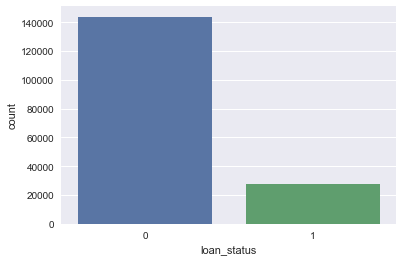

In [31]:
sns.countplot(x=df_filtered['loan_status'],data = df_filtered)


In [32]:
from collections import Counter
Counter(df_filtered['loan_status'])



Counter({0: 143919, 1: 27564})

In [33]:
print(df_filtered['loan_status'].dtype)
df_filtered.loan_status = df_filtered.loan_status.astype('category')


int64


C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
print('The categorical columns are :')
print(categorical_columns)
print('The numeric columns are :')
print(numeric_columns)

The categorical columns are :
['emp_length' 'fico_range' 'last_fico_range' 'term' 'verification_status'
 'home_ownership']
The numeric columns are :
['int_rate' 'bc_util' 'num_tl_op_past_12m' 'mort_acc' 'revol_util'
 'num_actv_rev_tl' 'acc_now_delinq' 'funded_amnt' 'tot_cur_bal'
 'total_bal_ex_mort' 'num_op_rev_tl' 'open_acc' 'loan_status' 'member_id'
 'num_rev_tl_bal_gt_0' 'annual_inc' 'collections_12_mths_ex_med'
 'num_il_tl' 'num_bc_sats' 'acc_open_past_24mths' 'pub_rec_bankruptcies'
 'num_actv_bc_tl' 'num_tl_90g_dpd_24m' 'delinq_amnt' 'delinq_2yrs'
 'pct_tl_nvr_dlq' 'total_bc_limit' 'percent_bc_gt_75' 'meanfico'
 'bc_open_to_buy' 'tot_hi_cred_lim' 'total_acc' 'dti'
 'chargeoff_within_12_mths' 'funded_amnt_inv' 'mean_last_fico'
 'num_rev_accts' 'avg_cur_bal' 'pub_rec' 'num_sats' 'total_rev_hi_lim'
 'inq_last_6mths' 'total_il_high_credit_limit' 'num_accts_ever_120_pd'
 'loan_amnt' 'num_bc_tl' 'revol_bal' 'tax_liens' 'installment'
 'tot_coll_amt']


In [35]:
print(df_filtered.shape)

(171483, 56)


In [36]:
#check and print the correlation
#examine the correlation matrix and drop highly correlated/redundant data to address multicollinearity
cor = df_filtered.corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
print('Below are the correlated features:')
print(cor[(cor > 0.55) | (cor < -0.55)])

Below are the correlated features:
revol_util                  bc_util                 0.811601
num_op_rev_tl               num_actv_rev_tl         0.791787
open_acc                    num_actv_rev_tl         0.591376
                            num_op_rev_tl           0.756255
num_rev_tl_bal_gt_0         num_actv_rev_tl         0.998466
                            num_op_rev_tl           0.793020
                            open_acc                0.592352
num_bc_sats                 num_actv_rev_tl         0.625006
                            num_op_rev_tl           0.724997
                            open_acc                0.581358
                            num_rev_tl_bal_gt_0     0.625225
acc_open_past_24mths        num_tl_op_past_12m      0.663965
num_actv_bc_tl              num_actv_rev_tl         0.791784
                            num_op_rev_tl           0.634812
                            num_rev_tl_bal_gt_0     0.790220
                            num_bc_sats           

In [37]:
#Drop correlated variables
df_filtered.drop(['bc_util','num_bc_sats','num_bc_tl','total_acc','acc_open_past_24mths','num_il_tl',
          'num_op_rev_tl','delinq_2yrs','total_il_high_credit_limit','revol_bal','num_actv_bc_tl','num_accts_ever_120_pd'
          ,'tax_liens','avg_cur_bal','funded_amnt','installment','tot_hi_cred_lim'
          ,'num_rev_tl_bal_gt_0','int_rate','pub_rec_bankruptcies','num_rev_accts','open_acc'
          ,'bc_open_to_buy' ], axis=1, inplace=True)
#df_filtered=df_filtered[exc_list]
print(df_filtered.shape)

(171483, 33)


C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
df_filtered.columns.values

array(['emp_length', 'num_tl_op_past_12m', 'mort_acc', 'revol_util',
       'num_actv_rev_tl', 'acc_now_delinq', 'tot_cur_bal',
       'total_bal_ex_mort', 'loan_status', 'member_id', 'fico_range',
       'annual_inc', 'last_fico_range', 'collections_12_mths_ex_med',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'pct_tl_nvr_dlq',
       'total_bc_limit', 'percent_bc_gt_75', 'meanfico', 'term',
       'verification_status', 'dti', 'chargeoff_within_12_mths',
       'funded_amnt_inv', 'mean_last_fico', 'home_ownership', 'pub_rec',
       'num_sats', 'total_rev_hi_lim', 'inq_last_6mths', 'loan_amnt',
       'tot_coll_amt'], dtype=object)

In [39]:
categorical = df_filtered.select_dtypes(include=['category'])
categorical.drop(['fico_range','last_fico_range','loan_status'], axis=1, inplace=True)
numeric = df_filtered.select_dtypes(exclude=['category'])

C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
print(categorical.columns.values)

['emp_length' 'term' 'verification_status' 'home_ownership']


In [41]:
#Convert Categorical Variables into dummy variables
df_with_dummy_var = pd.get_dummies(df_filtered,columns=categorical.columns.values)
print(df_with_dummy_var.shape)

(171483, 51)


In [42]:
df_with_dummy_var.columns.values

array(['num_tl_op_past_12m', 'mort_acc', 'revol_util', 'num_actv_rev_tl',
       'acc_now_delinq', 'tot_cur_bal', 'total_bal_ex_mort', 'loan_status',
       'member_id', 'fico_range', 'annual_inc', 'last_fico_range',
       'collections_12_mths_ex_med', 'num_tl_90g_dpd_24m', 'delinq_amnt',
       'pct_tl_nvr_dlq', 'total_bc_limit', 'percent_bc_gt_75', 'meanfico',
       'dti', 'chargeoff_within_12_mths', 'funded_amnt_inv',
       'mean_last_fico', 'pub_rec', 'num_sats', 'total_rev_hi_lim',
       'inq_last_6mths', 'loan_amnt', 'tot_coll_amt', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_< 1 year', 'emp_length_n/a', 'term_ 36 months',
       'term_ 60 months', 'verification_status_Not Verified',
       'verification_status_Source Verified',
       'verification_status_Verifi

In [43]:
df_with_dummy_var.to_csv('C:\\Users\\soumya\\Documents\\MACHINE_LEARNING\\Ind_Project\\df_with_dummy_var.csv')
df_filtered.to_csv('C:\\Users\\soumya\\Documents\\MACHINE_LEARNING\\Ind_Project\\df_filtered.csv')

In [44]:
def generateXY(df,target_col,var_list):
    
    X=df[varToUse]
    y=df[target_col]
    return X,y


In [45]:
#Data Splitting
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_with_dummy_var, test_size=0.2)

In [46]:
#Indeppendent and Dependent features
target_col='loan_status'
varToUse=df_with_dummy_var.columns.tolist()
varToUse.remove('loan_status')
varToUse.remove('last_fico_range')
varToUse.remove('fico_range')

Train_X,Train_Y = generateXY(train,target_col,varToUse)
Test_X,Test_Y = generateXY(test,target_col,varToUse)

In [47]:
print(target_col)
print(varToUse)

loan_status
['num_tl_op_past_12m', 'mort_acc', 'revol_util', 'num_actv_rev_tl', 'acc_now_delinq', 'tot_cur_bal', 'total_bal_ex_mort', 'member_id', 'annual_inc', 'collections_12_mths_ex_med', 'num_tl_90g_dpd_24m', 'delinq_amnt', 'pct_tl_nvr_dlq', 'total_bc_limit', 'percent_bc_gt_75', 'meanfico', 'dti', 'chargeoff_within_12_mths', 'funded_amnt_inv', 'mean_last_fico', 'pub_rec', 'num_sats', 'total_rev_hi_lim', 'inq_last_6mths', 'loan_amnt', 'tot_coll_amt', 'emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year', 'emp_length_n/a', 'term_ 36 months', 'term_ 60 months', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT']


In [48]:
print(Train_X.shape)
print(Train_Y.shape)
print(Test_X.shape)
print(Test_Y.shape)

(137186, 48)
(137186,)
(34297, 48)
(34297,)


In [49]:
print ("Model: Gaussian Naive Bayes")
nb = GaussianNB() 
#kf = KFold( n_splits=10, shuffle=True, random_state=0)

precision_nb = cross_val_score(nb, Train_X, Train_Y, cv=10, scoring='precision')
print ("Train Precision = {}".format(precision_nb.mean()))
recall_nb = cross_val_score(nb, Train_X, Train_Y, cv=10, scoring='recall')
print ("Train Recall = {}".format(precision_nb.mean()))
f1score_nb = cross_val_score(nb, Train_X, Train_Y, cv=10, scoring='f1')
print ("Train F1 Score  = {}".format(f1score_nb.mean()))
accscore_nb = cross_val_score(nb, Train_X, Train_Y, cv=10, scoring='accuracy', n_jobs=-1)
print ("Accuracy score  = {}".format(accscore_nb.mean()))


Model: Gaussian Naive Bayes
Train Precision = 0.6415106941357569
Train Recall = 0.6415106941357569
Train F1 Score  = 0.4927749595218754
Accuracy score  = 0.866597256754264


In [50]:
nb.fit(X=Train_X,y=Train_Y)

GaussianNB(priors=None)

In [51]:
y_pred_nb=nb.predict(Test_X)

In [52]:
nb_report=sklearn.metrics.classification_report(Test_Y,y_pred_nb)

In [53]:
print(nb_report)
print("confusion matrix")
print(confusion_matrix(Test_Y, y_pred_nb))
print("accuracy score")
print(accuracy_score(Test_Y, y_pred_nb, normalize=True, sample_weight=None))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92     28807
          1       0.64      0.41      0.50      5490

avg / total       0.85      0.87      0.86     34297

confusion matrix
[[27556  1251]
 [ 3240  2250]]
accuracy score
0.869055602531


In [54]:
print ("Model: Logistic Regression")
lr = LogisticRegression()

precision_lr = cross_val_score(lr, Train_X, Train_Y, cv=10, scoring='precision', n_jobs=-1)
print ("Precision = {}".format(precision_lr.mean()))
recall_lr = cross_val_score(lr, Train_X, Train_Y, cv=10, scoring='recall', n_jobs=-1)
print ("Recall    = {}".format(recall_lr.mean()))
f1score_lr = cross_val_score(lr, Train_X, Train_Y, cv=10, scoring='f1', n_jobs=-1)
print ("F1 score  = {}".format(f1score_lr.mean()))
accscore_lr = cross_val_score(lr, Train_X, Train_Y, cv=10, scoring='accuracy', n_jobs=-1)
print ("Accuracy score  = {}".format(accscore_lr.mean()))

Model: Logistic Regression
Precision = 0.7984215006763772
Recall    = 0.07629009393694634
F1 score  = 0.1323026224140645
Accuracy score  = 0.8487528315586225


In [55]:
lr.fit(X=Train_X,y=Train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_pred_lr=lr.predict(Test_X)

In [57]:
lr_report=sklearn.metrics.classification_report(Test_Y,y_pred_lr)

In [58]:
print(lr_report)
print("confusion matrix")
print(confusion_matrix(Test_Y, y_pred_lr))
print("accuracy score")
print(accuracy_score(Test_Y, y_pred_lr, normalize=True, sample_weight=None))

             precision    recall  f1-score   support

          0       0.85      0.99      0.92     28807
          1       0.81      0.11      0.20      5490

avg / total       0.85      0.85      0.80     34297

confusion matrix
[[28662   145]
 [ 4877   613]]
accuracy score
0.853573198822


In [59]:
print ("Model: KNeighborsClassifier")
neigh = KNeighborsClassifier(n_neighbors=3)

precision_neigh = cross_val_score(neigh, Train_X, Train_Y, cv=10, scoring='precision', n_jobs=-1)
print ("Precision = {}".format(precision_neigh.mean()))
recall_neigh = cross_val_score(neigh, Train_X, Train_Y, cv=10, scoring='recall', n_jobs=-1)
print ("Recall    = {}".format(recall_neigh.mean()))
f1score_neigh = cross_val_score(neigh, Train_X, Train_Y, cv=10, scoring='f1', n_jobs=-1)
print ("F1 score  = {}".format(f1score_neigh.mean()))
accscore_neigh = cross_val_score(neigh, Train_X, Train_Y, cv=10, scoring='accuracy', n_jobs=-1)
print ("Accuracy score  = {}".format(accscore_neigh.mean()))

Model: KNeighborsClassifier
Precision = 0.19288100131610608
Recall    = 0.08693507729030818
F1 score  = 0.11981333077807788
Accuracy score  = 0.7945125503882973


In [60]:
neigh.fit(X=Train_X,y=Train_Y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [61]:
y_pred_neigh=neigh.predict(Test_X)

In [62]:
neigh_report=sklearn.metrics.classification_report(Test_Y,y_pred_neigh)

In [63]:
print(neigh_report)
print("confusion matrix")
print(confusion_matrix(Test_Y, y_pred_neigh))
print("accuracy score")
print(accuracy_score(Test_Y, y_pred_neigh, normalize=True, sample_weight=None))

             precision    recall  f1-score   support

          0       0.84      0.93      0.89     28807
          1       0.21      0.09      0.13      5490

avg / total       0.74      0.80      0.76     34297

confusion matrix
[[26853  1954]
 [ 4984   506]]
accuracy score
0.797708254366


In [64]:
print ("Model: DecisionTreeClassifier")
dt = DecisionTreeClassifier(random_state=0)

precision_dt = cross_val_score(dt, Train_X, Train_Y, cv=10, scoring='precision', n_jobs=-1)
print ("Precision = {}".format(precision_dt.mean()))
recall_dt = cross_val_score(dt, Train_X, Train_Y, cv=10, scoring='recall', n_jobs=-1)
print ("Recall    = {}".format(recall_dt.mean()))
f1score_dt = cross_val_score(dt, Train_X, Train_Y, cv=10, scoring='f1', n_jobs=-1)
print ("F1 score  = {}".format(f1score_dt.mean()))
accscore_dt = cross_val_score(dt, Train_X, Train_Y, cv=10, scoring='accuracy', n_jobs=-1)
print ("Accuracy score  = {}".format(accscore_dt.mean()))

Model: DecisionTreeClassifier
Precision = 0.5652390545610217
Recall    = 0.5721652080337267
F1 score  = 0.5686278382343237
Accuracy score  = 0.8603500429947604


In [65]:
dt.fit(X=Train_X,y=Train_Y) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [66]:
y_pred_dt=dt.predict(Test_X)

In [67]:
dt_report=sklearn.metrics.classification_report(Test_Y,y_pred_dt)

In [68]:
print(dt_report)
print("confusion matrix")
print(confusion_matrix(Test_Y, y_pred_dt))
print("accuracy score")
print(accuracy_score(Test_Y, y_pred_dt, normalize=True, sample_weight=None))

             precision    recall  f1-score   support

          0       0.92      0.92      0.92     28807
          1       0.56      0.57      0.57      5490

avg / total       0.86      0.86      0.86     34297

confusion matrix
[[26390  2417]
 [ 2351  3139]]
accuracy score
0.860979094381


In [69]:
print ("Model: RandomForestClassifier")
rfc = RandomForestClassifier(max_depth=2, random_state=0)
precision_rfc = cross_val_score(rfc, Train_X, Train_Y, cv=10, scoring='precision', n_jobs=-1)
print ("Precision = {}".format(precision_rfc.mean()))
recall_rfc = cross_val_score(rfc, Train_X, Train_Y, cv=10, scoring='recall', n_jobs=-1)
print ("Recall    = {}".format(recall_rfc.mean()))
f1score_rfc = cross_val_score(rfc, Train_X, Train_Y, cv=10, scoring='f1', n_jobs=-1)
print ("F1 score  = {}".format(f1score_rfc.mean()))
accscore_rfc = cross_val_score(rfc, Train_X, Train_Y, cv=10, scoring='accuracy', n_jobs=-1)
print ("Accuracy score  = {}".format(accscore_rfc.mean()))

Model: RandomForestClassifier
Precision = 0.0
Recall    = 0.0
F1 score  = 0.0
Accuracy score  = 0.8390943695956332


In [70]:
rfc.fit(X=Train_X,y=Train_Y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [71]:
y_pred_rfc=rfc.predict(Test_X)

In [72]:
rfc_report=sklearn.metrics.classification_report(Test_Y,y_pred_rfc)

C:\Users\soumya\Anaconda3\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
print(rfc_report)
print("confusion matrix")
print(confusion_matrix(Test_Y, y_pred_rfc))
print("accuracy score")
print(accuracy_score(Test_Y, y_pred_rfc, normalize=True, sample_weight=None))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91     28807
          1       0.00      0.00      0.00      5490

avg / total       0.71      0.84      0.77     34297

confusion matrix
[[28807     0]
 [ 5490     0]]
accuracy score
0.839927690469
